In [110]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt


In [130]:
df = pd.read_csv("D:/Superstore.csv",encoding='ISO-8859-1')

In [132]:
df = df.dropna()
label_encoder = LabelEncoder()
categorical_columns = ['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Region', 'Category', 'Sub-Category', 'Product Name']
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

In [134]:
df = df.drop(columns=['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Customer ID', 'Customer Name', 'Product ID'])
X = df.drop(columns=['Profit'])
y = df['Profit']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [136]:
xgb_model = XGBRegressor(random_state=42,enable_categorical=True)
xgb_model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=True, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [137]:
y_pred = xgb_model.predict(X_test)
mse = mean_squared_error(y_test,y_pred)
print(f"mean squared erroe:{mse:.2f}")

mean squared erroe:16002.36


In [138]:
feature_importances = xgb_model.feature_importances_
sorted_idx = np.argsort(feature_importances)[::-1]
top_10_idx = sorted_idx[:10]
top_10_features = X.columns[top_10_idx]
top_10_importances = feature_importances[top_10_idx]

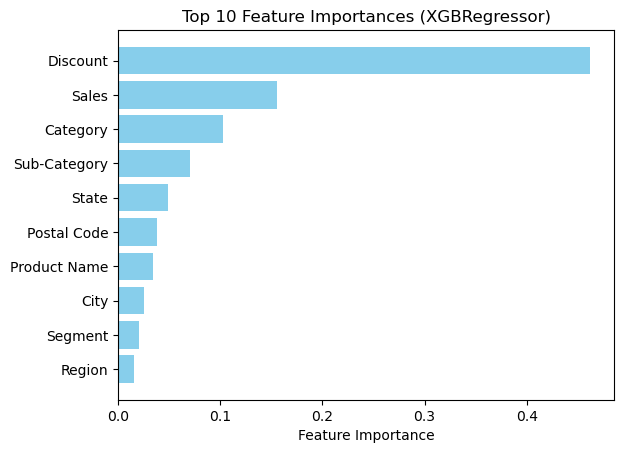

In [140]:
plt.barh(top_10_features, top_10_importances, color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Top 10 Feature Importances (XGBRegressor)')
plt.gca().invert_yaxis()
plt.show()